In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("./Datasets/50_Startups.csv")

In [3]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
cat_columns=df.select_dtypes(['object']).columns
df[cat_columns]=df[cat_columns].apply(lambda x:pd.factorize(x)[0])
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [5]:
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [7]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (50, 5)
shape of input - training set (35, 3)
shape of output - training set (35,)
shape of input - testing set (15, 3)
shape of output - testing set (15,)


In [8]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [9]:
print("Intercept: ",mlr.intercept_)
print("Coefficients: ")
list(zip(x,mlr.coef_))

Intercept:  48077.0099846694
Coefficients: 


[('R&D Spend', 0.7843042955159885),
 ('Administration', 0.0020545536245888778),
 ('Marketing Spend', 0.024776284352067243)]

In [10]:
y_pred_mlr=mlr.predict(x_test)
print("Predictoin for the test set: {}".format(y_pred_mlr))

Predictoin for the test set: [ 87628.28196965 108811.37122882  66491.19332731  70483.23727241
  48355.25185402 115516.98224086 171046.99172994  99195.03167352
 158593.85307231 157123.26972629  82824.93857836 178736.75650456
  75153.94838979  99216.16113297 133912.85478708]


In [11]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
37,89949.14,87628.281970
23,108733.99,108811.371229
44,65200.33,66491.193327
42,71498.49,70483.237272
47,42559.73,48355.251854


In [12]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
print('Mean Absolute Error:', meanAbErr)
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))

Mean Absolute Error: 4074.1789568175723
R squared: 94.94


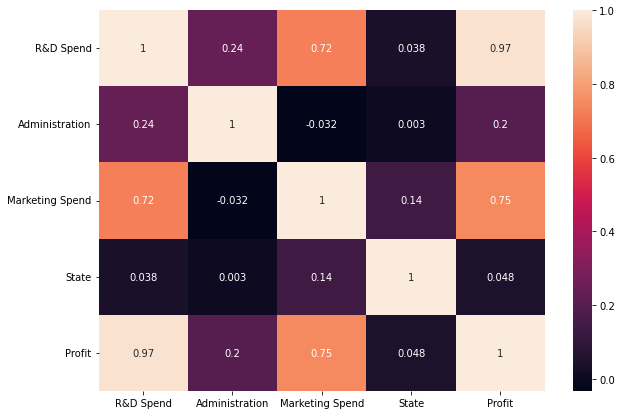

In [13]:

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()